## Setup

In [3]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import pandas as pd

## Tensorboard Log Parser

In [4]:
# credit: Kyle Stachowicz
def extract_tensorboard_scalars(log_file, scalar_keys):
    # Initialize an EventAccumulator with the path to the log directory
    event_acc = EventAccumulator(log_file)
    event_acc.Reload()  # Load the events from disk

    if isinstance(scalar_keys, str):
        scalar_keys = [scalar_keys]

    # Extract the scalar summaries
    scalars = {}
    for tag in scalar_keys:
        scalars_for_tag = event_acc.Scalars(tag)
        scalars[tag] = {
            'step': [s.step for s in scalars_for_tag],
            'wall_time': [s.wall_time for s in scalars_for_tag],
            'value': [s.value for s in scalars_for_tag],
        }

    return scalars

## Problem 3

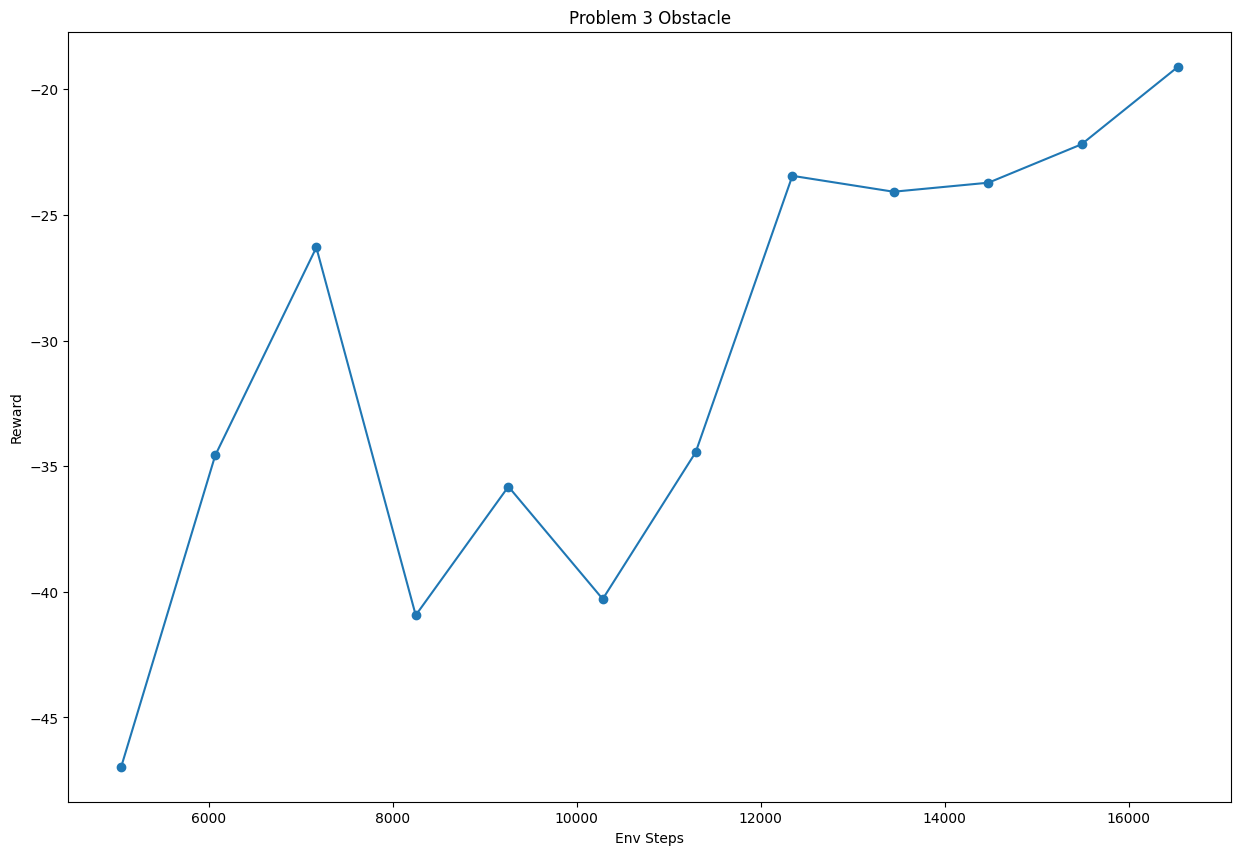

In [5]:
data = extract_tensorboard_scalars("../../data/obstacles-cs285-v0_obstacles_multi_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_18-07-13/events.out.tfevents.1698714433.wifi-10-40-95-65.wifi.berkeley.edu", ["eval_return","total_envsteps"])
value = data["eval_return"]["value"]
step = data["total_envsteps"]["value"]
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(step, value, marker='o')
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 3 Obstacle")
plt.savefig("Problem 3/Problem 3 Obstacle.png")
plt.show()

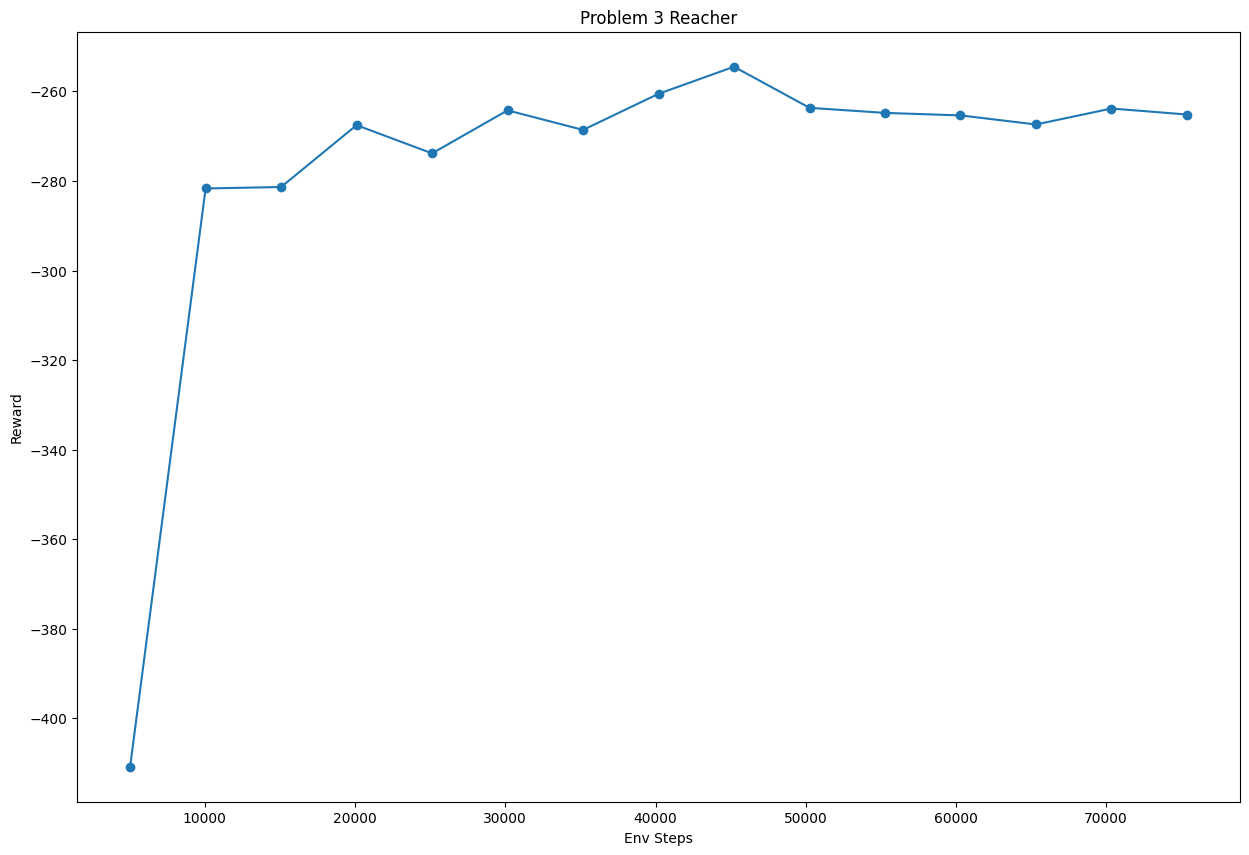

In [6]:
data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_multi_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_19-53-34/events.out.tfevents.1698720814.zekai-MS-7E07", ["eval_return","total_envsteps"])
value = data["eval_return"]["value"]
step = data["total_envsteps"]["value"]
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(step, value, marker='o')
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 3 Reacher")
plt.savefig("Problem 3/Problem 3 Reacher.png")
plt.show()

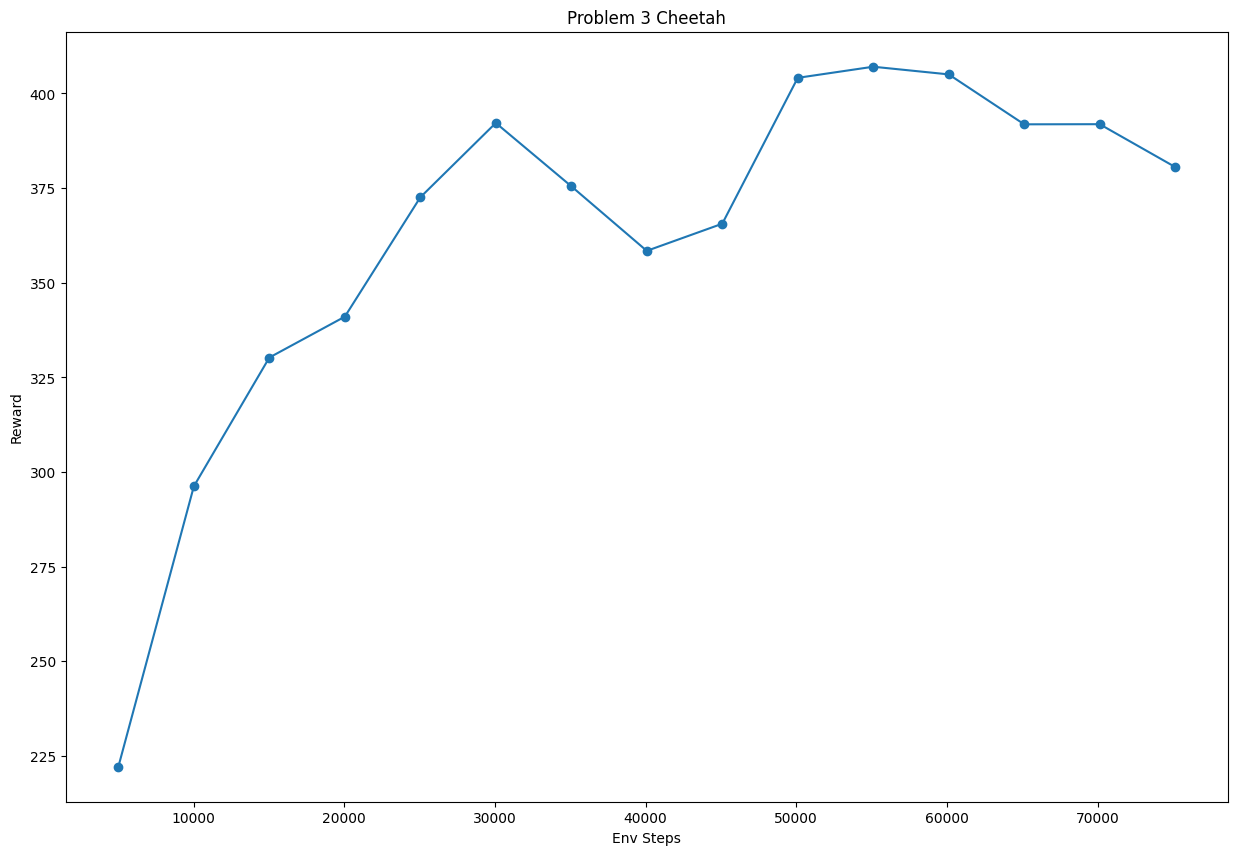

In [7]:
data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_multi_l2_h250_mpcrandom_horizon15_actionseq1000_30-10-2023_19-53-55/events.out.tfevents.1698720835.zekai-MS-7E07", ["eval_return", "total_envsteps"])
value = data["eval_return"]["value"]
step = data["total_envsteps"]["value"]
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(step, value, marker='o')
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 3 Cheetah")
plt.savefig("Problem 3/Problem 3 Cheetah.png")
plt.show()

## Problem 4

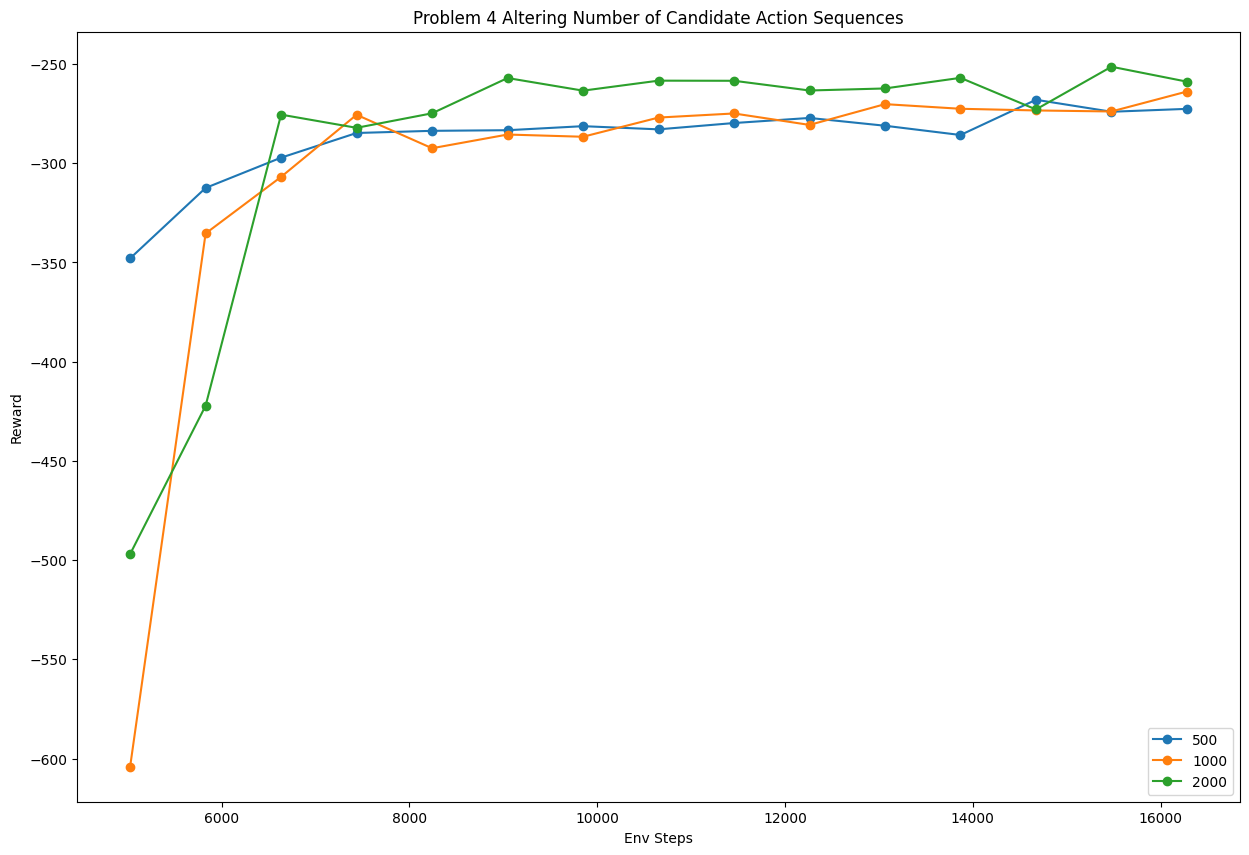

In [8]:
# mpc_num_action_sequences
increased_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_numaction_increased_l2_h250_mpcrandom_horizon10_actionseq2000_30-10-2023_19-59-05/events.out.tfevents.1698721145.zekai-MS-7E07", ["eval_return", "total_envsteps"])
vanilla_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_19-57-15/events.out.tfevents.1698721035.zekai-MS-7E07", ["eval_return", "total_envsteps"])
decreased_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_numaction_decreased_l2_h250_mpcrandom_horizon10_actionseq500_30-10-2023_19-59-33/events.out.tfevents.1698721173.zekai-MS-7E07", ["eval_return", "total_envsteps"])
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(decreased_data["total_envsteps"]["value"], decreased_data["eval_return"]["value"], marker='o', label="500")
ax.plot(vanilla_data["total_envsteps"]["value"], vanilla_data["eval_return"]["value"], marker='o', label="1000")
ax.plot(increased_data["total_envsteps"]["value"], increased_data["eval_return"]["value"], marker='o', label="2000")
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 4 Altering Number of Candidate Action Sequences")
ax.legend(loc="lower right")
plt.savefig("Problem 4/Problem 4 numaction.png")
plt.show()

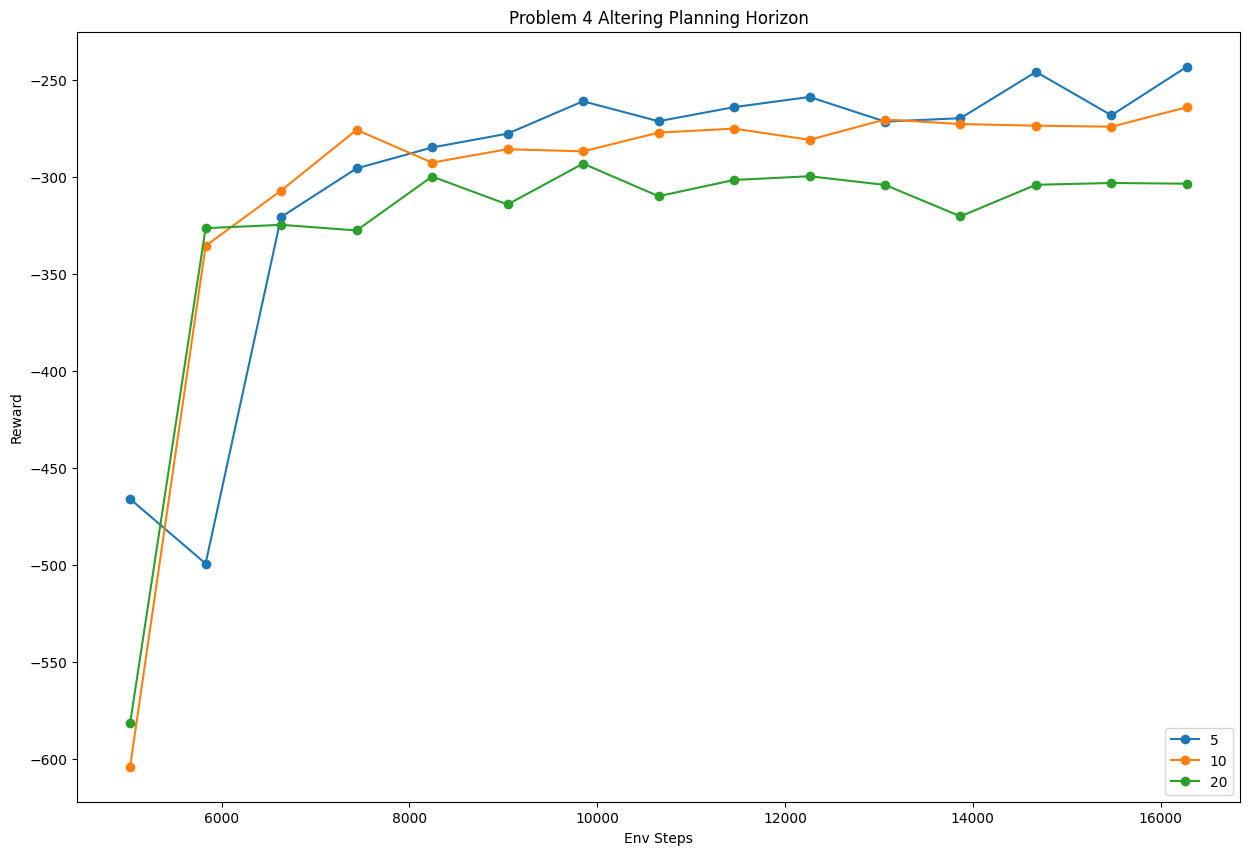

In [9]:
# horizon
increased_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_horizon_increased_l2_h250_mpcrandom_horizon20_actionseq1000_30-10-2023_20-00-56/events.out.tfevents.1698721256.zekai-MS-7E07", ["eval_return", "total_envsteps"])
vanilla_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_19-57-15/events.out.tfevents.1698721035.zekai-MS-7E07", ["eval_return", "total_envsteps"])
decreased_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_horizon_decreased_l2_h250_mpcrandom_horizon5_actionseq1000_30-10-2023_20-01-09/events.out.tfevents.1698721269.zekai-MS-7E07", ["eval_return", "total_envsteps"])
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(decreased_data["total_envsteps"]["value"], decreased_data["eval_return"]["value"], marker='o', label="5")
ax.plot(vanilla_data["total_envsteps"]["value"], vanilla_data["eval_return"]["value"], marker='o', label="10")
ax.plot(increased_data["total_envsteps"]["value"], increased_data["eval_return"]["value"], marker='o', label="20")
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 4 Altering Planning Horizon")
ax.legend(loc="lower right")
plt.savefig("Problem 4/Problem 4 horizon.png")
plt.show()

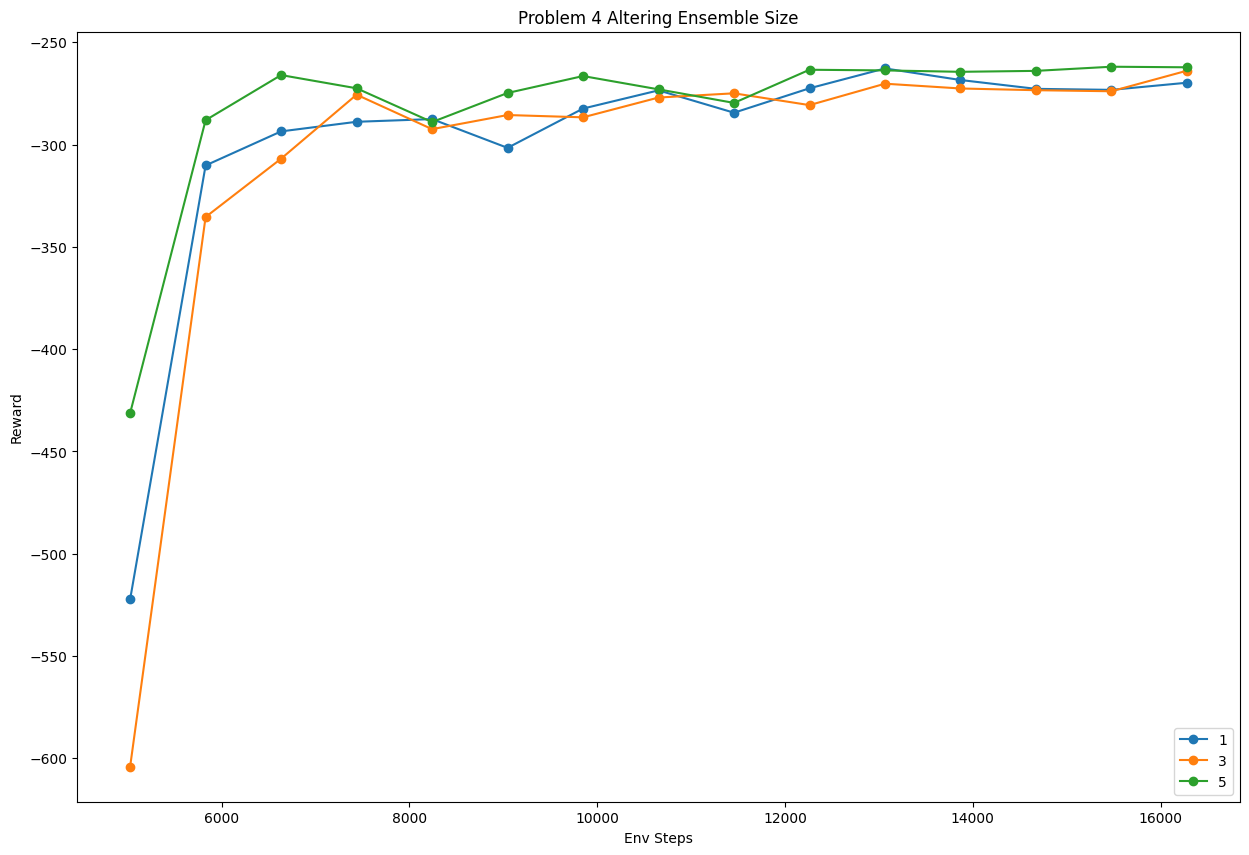

In [13]:
# ensemble
increased_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_ensembled_increased_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_20-04-49/events.out.tfevents.1698721489.zekai-MS-7E07", ["eval_return", "total_envsteps"])
vanilla_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_19-57-15/events.out.tfevents.1698721035.zekai-MS-7E07", ["eval_return", "total_envsteps"])
decreased_data = extract_tensorboard_scalars("../../data/reacher-cs285-v0_reacher_ablation_ensembled_decreased_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_20-05-40/events.out.tfevents.1698721540.zekai-MS-7E07", ["eval_return", "total_envsteps"])
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(decreased_data["total_envsteps"]["value"], decreased_data["eval_return"]["value"], marker='o', label="1")
ax.plot(vanilla_data["total_envsteps"]["value"], vanilla_data["eval_return"]["value"], marker='o', label="3")
ax.plot(increased_data["total_envsteps"]["value"], increased_data["eval_return"]["value"], marker='o', label="5")
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 4 Altering Ensemble Size")
ax.legend(loc="lower right")
plt.savefig("Problem 4/Problem 4 ensemble.png")
plt.show()

## Problem 5

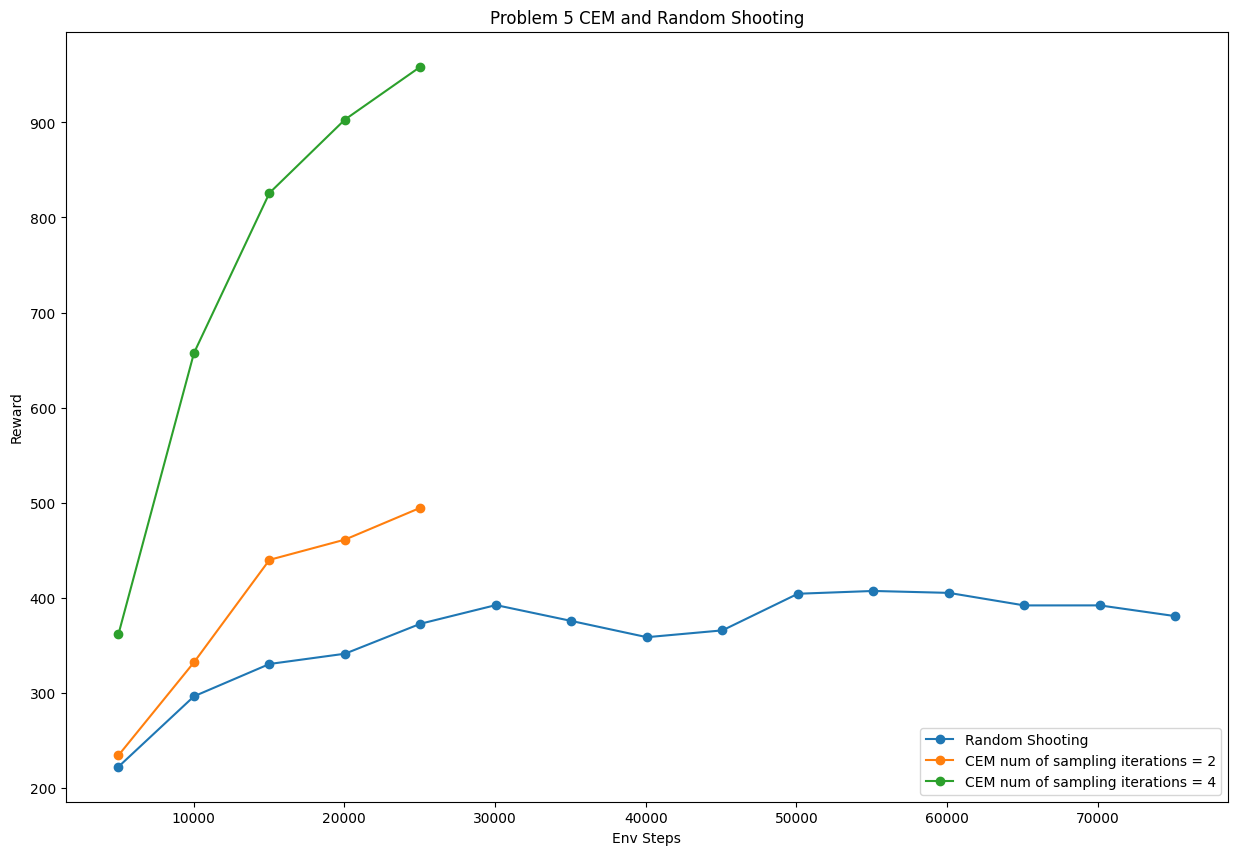

In [14]:
cem_2_data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_cem_l2_h250_mpccem_horizon15_actionseq1000_cem_iters2_01-11-2023_18-21-41/events.out.tfevents.1698888101.zekai-MS-7E07", ["eval_return", "total_envsteps"])
cem_4_data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_cem_l2_h250_mpccem_horizon15_actionseq1000_cem_iters4_01-11-2023_18-06-35/events.out.tfevents.1698887195.zekai-MS-7E07", ["eval_return", "total_envsteps"])
vanilla_data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_multi_l2_h250_mpcrandom_horizon15_actionseq1000_30-10-2023_19-53-55/events.out.tfevents.1698720835.zekai-MS-7E07", ["eval_return", "total_envsteps"])
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(vanilla_data["total_envsteps"]["value"], vanilla_data["eval_return"]["value"], marker='o', label="Random Shooting")
ax.plot(cem_2_data["total_envsteps"]["value"], cem_2_data["eval_return"]["value"], marker='o', label="CEM num of sampling iterations = 2")
ax.plot(cem_4_data["total_envsteps"]["value"], cem_4_data["eval_return"]["value"], marker='o', label="CEM num of sampling iterations = 4")
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 5 CEM and Random Shooting")
ax.legend(loc="lower right")
plt.savefig("Problem 5/Problem 5 cem.png")
plt.show()

## Problem 6

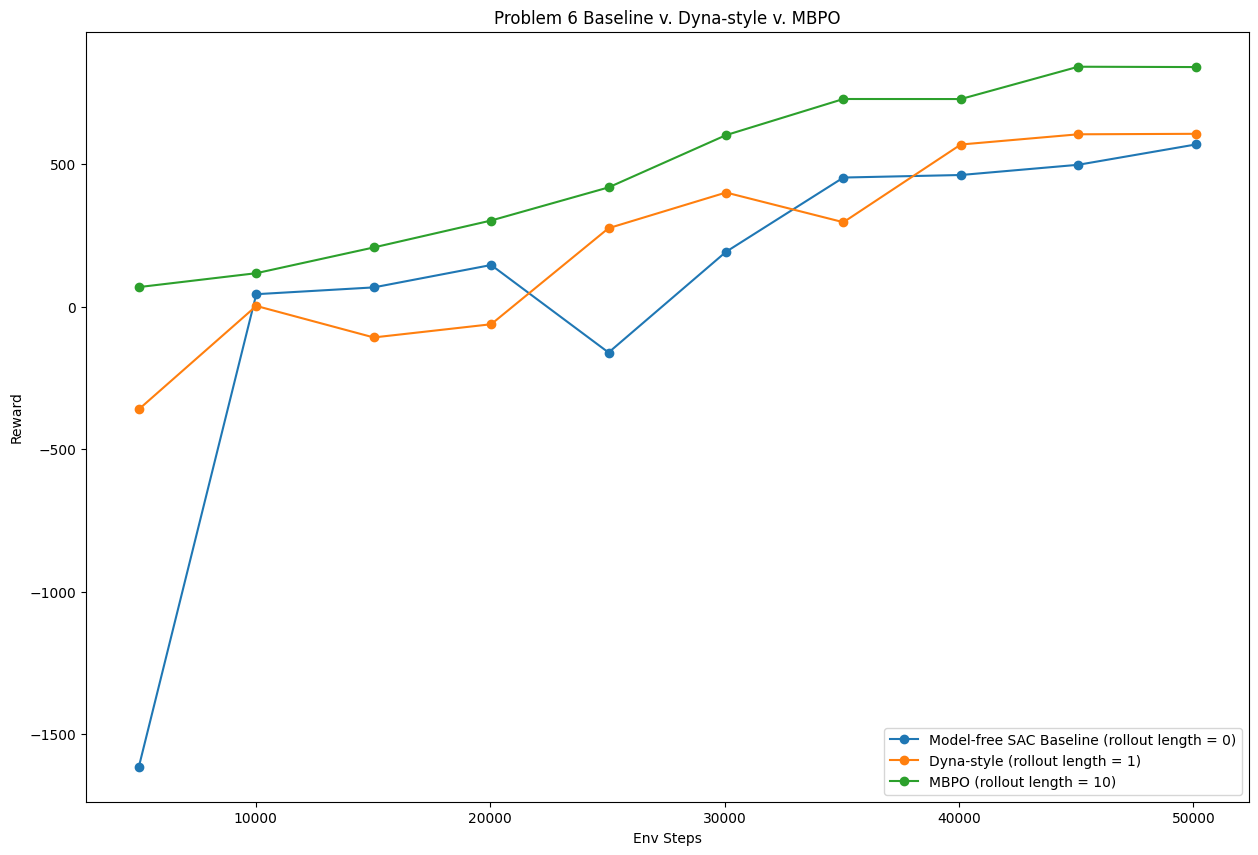

In [12]:
baseline_data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_mbpo_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_20-25-15/events.out.tfevents.1698722715.zekai-MS-7E07", ["eval_return", "total_envsteps"])
dyna_data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_mbpo_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_20-28-14/events.out.tfevents.1698722894.zekai-MS-7E07", ["eval_return", "total_envsteps"])
mbpo_data = extract_tensorboard_scalars("../../data/cheetah-cs285-v0_cheetah_mbpo_l2_h250_mpcrandom_horizon10_actionseq1000_30-10-2023_20-34-38/events.out.tfevents.1698723278.zekai-MS-7E07", ["eval_return", "total_envsteps"])
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(baseline_data["total_envsteps"]["value"], baseline_data["eval_return"]["value"], marker='o', label="Model-free SAC Baseline (rollout length = 0)")
ax.plot(dyna_data["total_envsteps"]["value"], dyna_data["eval_return"]["value"], marker='o', label="Dyna-style (rollout length = 1)")
ax.plot(mbpo_data["total_envsteps"]["value"], mbpo_data["eval_return"]["value"], marker='o', label="MBPO (rollout length = 10)")
ax.set_xlabel("Env Steps")
ax.set_ylabel("Reward")
ax.set_title("Problem 6 Baseline v. Dyna-style v. MBPO")
ax.legend(loc="lower right")
plt.savefig("Problem 6/Problem 6 mbpo.png")
plt.show()